Zadanie 2.

Zadanie polaga na sprawdzeniu poprawności i efektywności różnych metod generowania rozkładu normalnego. Poniżej załadowanie potrzebnych bibliotek.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import time

Metoda odwrotnej dystrybuanty

Funkcja zwraca próbkę z rozkładu normalnego o zadanym mu (wartości oczekiwanej) i sigma (odchyleniu standardowym), używając funkcji scipy.stats.norm.ppf().
Metoda polega na wyznaczeniu $X$ ze wzoru na dystrybuantę tego rozkładu $F_X(x)=P(X<x)$


In [11]:

def odwrocona_dystrybuanta_nor(mu=0, sigma=1):  
    """
   Zwraca próbkę z rozkładu normalnego o podanym mu (wartości oczekiwanej) i sigma (odchyleniu standardowym).
   Używając funkcji scipy.stats.norm.ppf()
    
    Parameters:
    mu (int) , sigma (int) parametry rozkładu.
    
    Returns:
    x (float64) próbka z rozkładu.
    """
    U = np.random. uniform()
    x = mu + sigma * scipy.stats.norm.ppf(U)
    return x


Metoda Boxa-Mullera

Funkcja zwraca dwie próbki o długości size pochodzące ze standardowego rozkładu normalnego za pomocą metody Boxa-Mullera. Metoda ta polega na przekształceniu rozkładu jednostajnego w rozkład normalny poprzez wykorzystanie właściwości geometrycznych koła w przestrzeni dwuwymiarowej oraz logarytmu naturalnego.

In [12]:
def box_mull(size):
    """
    Tworzy próbkę o długości size pochodzącą ze standardowego rozkładu normalnego za pomocą metody Boxa-Mullera.
    
    Input:
    size (int): Długość próbki.
    
    Output:
    result_x, result_y (tuple): Dwie próbki z dwóch standardowych rozkładów normalnych.
    """
    result_x = np.zeros(size)
    result_y = np.zeros(size)
    for i in range(size):
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)
        x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        y = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        result_x[i] = x
        result_y[i] = y
    return result_x, result_y


Metoda Margsalli

Funkcja zwraca próbkę o długości n ze standardowego rozkładu noramlnego. Jej działanie jest podobne do wcześniejszej metody Boxa-Mullera, jednak nie wykorzystuje działań trygonometrycznych co wpływa na jej szybkość.

In [13]:
def marsaglia_polar_method(n):
    """
    Tworzy próbkę o długości size pochodzącą ze standardowego rozkładu normalnego za pomocą metody Margsalii.
    
    Input:
    n (int): Długość próbki.
    
    Output:
    samples(numpy.ndarray): Próbka ze standardowego rozkładu normalnego.
    """
    samples = np.zeros(n)
    i = 0
    while i < n:
        u1 = np.random.uniform(-1, 1)
        u2 = np.random.uniform(-1, 1)
        s = u1**2 + u2**2
        if s >= 1 or s == 0:
            continue
        multiplier = np.sqrt(-2 * np.log(s) / s)
        samples[i] = u1 * multiplier
        if i + 1 < n:
            samples[i + 1] = u2 * multiplier
        i += 2
    return samples

Metoda tuzina

Metoda tuzina polega na generowaniu ciągu liczb, w którym każda nowa liczba jest w pewien sposób zależna od poprzednich liczb w ciągu, zwykle w grupach po 12 elementów.

In [14]:
def metoda_tuzina(N, m=0, s=1):
    """
    Tworzy próbkę o długości n pochodzącą z rozkładu normalnego za pomocą metody tuzina.
    
    Input:
    N (int): Długość próbki.
    m (int): średnia rozkładu.
    s (int): odchylenie standardowe rozkładu
    
    Output:
    np.ndarray: Tablica z próbką.
    """
    samples = []
    for i in range(N):
        U = np.random.uniform(0, 1, 12)

        S = sum(U)
        X = S - 6
        Y = s*X + m

        samples.append(Y)
    return samples

Metoda zigguratu

Metoda zigguratu dzieli obszar pod krzywą gęstości prawdopodobieństwa na kilka prostokątnych segmentów i jedną warstwę bazową o dowolnym kształcie. Każda warstwa prostokątna ma taką samą szerokość, ale różną wysokość, tak aby suma powierzchni wszystkich warstw była równa 1, co odpowiada całkowitej powierzchni pod krzywą gęstości rozkładu.Punkt losowy jest generowany poprzez losowe wybieranie warstwy, a następnie losowanie punktu wewnątrz tej warstwy. Dla większości punktów, które wpadają w prostokątne warstwy, akceptacja jest natychmiastowa. Dla punktów, które wpadają w warstwę bazową, konieczne jest wykonanie dodatkowego kroku akceptacji-odrzucenia.

In [15]:
def prostokaty(n):
    """
    Tworzy podział na warstwy i zwraca je w postaci tablic x i y.
    Input: n(int) liczba warstw 
    Output: x,y (np.ndarrays) tablice potrzebne do działania algorytmu.
    """
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0] = 3.4426
    y[0] = scipy.stats.norm.pdf(x[0])
    for i in range(1, n):
        y[i] = y[i - 1] + 1 / n / x[i - 1]
        x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))
    y[n] = scipy.stats.norm.pdf(0)
    x[n] = 0
    return x, y

def ogon(x):
    """
    Funkcja pomocnicza, do tworzenia ogonów rozkładu.
    Input: x (float) liczba, która jest konwertowana. 
    Output: x_t + x (float) wynik
    """  
    u1 = np.random.rand()
    u2 = np.random.rand()
    x_t = -np.log(u1) / x
    y_t = -np.log(u2)
    if 2 * y_t > x_t**2:
        return x_t + x

def ziggurat_algortihm(n, x, y):
    """
    Funkcja zwracająca próbkę rozkładu normalnego standardowego.
    Input:
    n (int): liczba warstw
    x, y (np.ndarrays): tablice stworzone przez funkcje prostokaty.
    Output: 
    x_ (np.ndarray) próbka
    counter (int): powtórzenia funkcji wykładniczej.
    """
    counter = 0
    while True:
        i = np.random.randint(0, n)
        U = np.random.uniform(-1,1)
        x_ = U * x[i]
        if x_ < x[i + 1]:
            return x_, counter
        if i == 0:
            counter += 1
            return ogon(x[0]), counter
        U1 = np.random.rand()
        y_ = y[i] + U1 * (y[i + 1] - y[i])
        if y_ < scipy.stats.norm.pdf(x_):
            return x_, counter


Poniżej znajdją się wykresy z gęstością empiryczną (histogram próbek) i teoretyczną.

C:\TEMP\ipykernel_14328\2822808572.py:13: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))


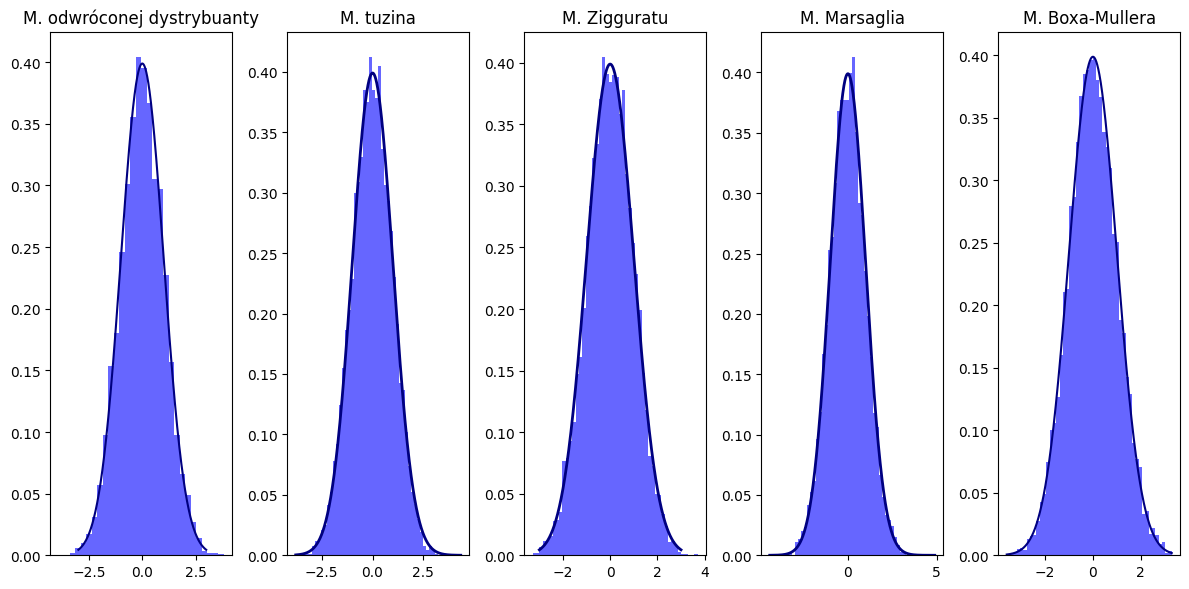

In [16]:
n = 10000 # długość próbki

plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
x_axis = np.linspace(-3, 3, n)
y_axis  = scipy.stats.norm.pdf(x_axis) #teoretyczna
probki = [odwrocona_dystrybuanta_nor(0, 1) for i in range(n)] 
xmin, xmax = plt.xlim()
title = "M. odwróconej dystrybuanty" 
plt.title(title)
plt.plot(x_axis, y_axis, color = 'navy')
plt.hist(probki, bins = 30, density = True, color = 'blue', alpha = 0.6)


plt.subplot(1, 5, 2)
samples_tuzina = metoda_tuzina(n)
plt.hist(samples_tuzina, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n)
p = scipy.stats.norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2, color = 'navy')
title = "M. tuzina"
plt.title(title)

plt.subplot(1, 5, 3)
x, y = prostokaty(256)
samples = [ziggurat_algortihm(256, x, y)[0] for _ in range(n)]
plt.hist(samples, bins=50, density=True, color='b', alpha = 0.6)
xmin, xmax = plt.xlim()
x = np.linspace(-3, 3, n)
p = scipy.stats.norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2, color = 'navy')
title = "M. Zigguratu"
plt.title(title)

plt.subplot(1, 5, 4)
samples_marsaglia = marsaglia_polar_method(n)
plt.hist(samples_marsaglia, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, n)
p = scipy.stats.norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2, color = 'navy')
title = "M. Marsaglia" 
plt.title(title)

plt.subplot(1, 5, 5)
x, y = box_mull(n)
x_axis = np.linspace(min(x), max(x), n)
y_axis  = scipy.stats.norm.pdf(x_axis) #teoretyczna
plt.hist(x, color="blue",density=True, alpha = 0.6, bins = 50)
plt.plot(x_axis, y_axis, color = 'navy')
title = "M. Boxa-Mullera" 
plt.title(title)


plt.tight_layout()
plt.show()


Poniżej znajduje się metoda pomiaru czasów dla poszczególnych algorytmów.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


C:\TEMP\ipykernel_14328\2822808572.py:13: RuntimeWarning: invalid value encountered in sqrt
  x[i] = np.sqrt(-2 * np.log(y[i] * np.sqrt(2 * np.pi)))


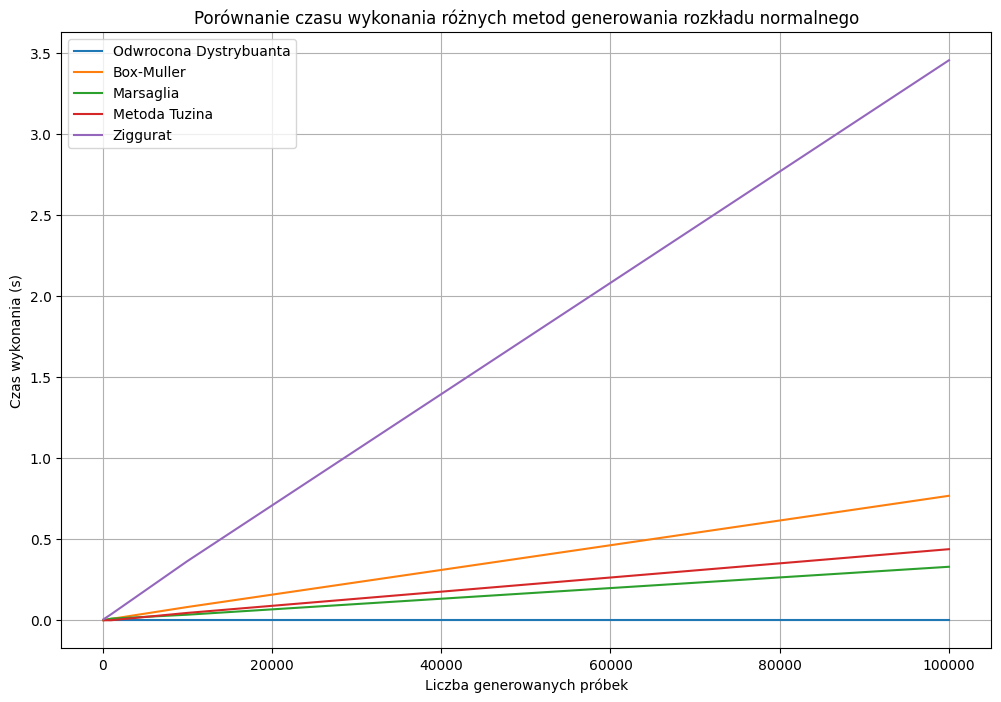

In [17]:
# Funkcja do mierzenia czasu wykonania metod
def measure_time(method, size, *args):
    start_time = time.time()
    method(size, *args)
    end_time = time.time()
    return end_time - start_time

# Główna funkcja do porównania metod
def compare_methods(methods, sizes):
    plt.figure(figsize=(12, 8))

    for method_name, method in methods.items():
        times = [measure_time(method, size) for size in sizes]
        plt.plot(sizes, times, label=method_name)

    zig_times = []
    for size in sizes:
        start_time = time.time()
        x, y = prostokaty(256)
        [ziggurat_algortihm(256, x, y) for _ in range(size)]
        end_time = time.time()
        zig_time = end_time - start_time
        zig_times.append(zig_time)
    plt.plot(sizes, zig_times, label = 'Ziggurat')

    plt.xlabel('Liczba generowanych próbek')
    plt.ylabel('Czas wykonania (s)')
    plt.title('Porównanie czasu wykonania różnych metod generowania rozkładu normalnego')
    plt.legend()
    plt.grid(True)
    plt.show()

methods = {
    'Odwrocona Dystrybuanta': odwrocona_dystrybuanta_nor,
    'Box-Muller': box_mull,
    'Marsaglia': marsaglia_polar_method,
    'Metoda Tuzina': metoda_tuzina,
}

sizes = [100, 1000, 10000, 100000]

# Porównanie metod
compare_methods(methods, sizes)

Analiza czasowa wykazała, że najlepiej wypada metoda odwróconej dystrybuanty, najgorzej natomiast metoda Zigguratu (uwzględniając funkcje tworzącą prostokąty), pozstałe trzy wypadają podobnie. 